In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
data = {
    "area": [850, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2500, 2800, 3200, 3600],
    "bedrooms": [2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 6, 6],
    "bathrooms": [1, 2, 2, 2, 3, 2, 3, 3, 3, 4, 4, 5],
    "price": [120000, 150000, 180000, 200000, 220000, 240000, 270000, 300000,
              350000, 400000, 450000, 500000]
}

df = pd.DataFrame(data)
print("📌 Sample House Price Dataset:")
print(df.to_string(index=False))

📌 Sample House Price Dataset:
 area  bedrooms  bathrooms  price
  850         2          1 120000
 1000         2          2 150000
 1200         3          2 180000
 1400         3          2 200000
 1600         3          3 220000
 1800         4          2 240000
 2000         4          3 270000
 2200         4          3 300000
 2500         5          3 350000
 2800         5          4 400000
 3200         6          4 450000
 3600         6          5 500000


In [7]:
X = df[['area', 'bedrooms', 'bathrooms']]
y = df['price']
print(X.head())
print(y.head());

   area  bedrooms  bathrooms
0   850         2          1
1  1000         2          2
2  1200         3          2
3  1400         3          2
4  1600         3          3
0    120000
1    150000
2    180000
3    200000
4    220000
Name: price, dtype: int64


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("📌 Training Data:")
print(X_train)
print("\n📌 Testing Data:")
print(X_test)



📌 Training Data:
    area  bedrooms  bathrooms
8   2500         5          3
5   1800         4          2
2   1200         3          2
1   1000         2          2
11  3600         6          5
4   1600         3          3
7   2200         4          3
3   1400         3          2
6   2000         4          3

📌 Testing Data:
    area  bedrooms  bathrooms
10  3200         6          4
9   2800         5          4
0    850         2          1


In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

print("✅ Model trained successfully!")


✅ Model trained successfully!


In [14]:
y_pred = model.predict(X_test)

print("📌 Predictions vs Actual:")
results = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
print(results)


📌 Predictions vs Actual:
    Actual      Predicted
10  450000  439092.689295
9   400000  387212.793734
0   120000  119582.245431


In [16]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n📌 Model Evaluation:")
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R² Score:", r2)



📌 Model Evaluation:
Mean Squared Error: 94218863.26400417
Root Mean Squared Error: 9706.640163517146
R² Score: 0.9955322983699892


In [17]:
# Example: 2500 sq ft, 3 bedrooms, 2 bathrooms
new_house = [[2500, 3, 2]]
predicted_price = model.predict(new_house)

print(f"\n📌 Predicted Price for 2500 sq ft, 3BHK, 2 Bath: ${predicted_price[0]:,.2f}")



📌 Predicted Price for 2500 sq ft, 3BHK, 2 Bath: $333,596.61


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


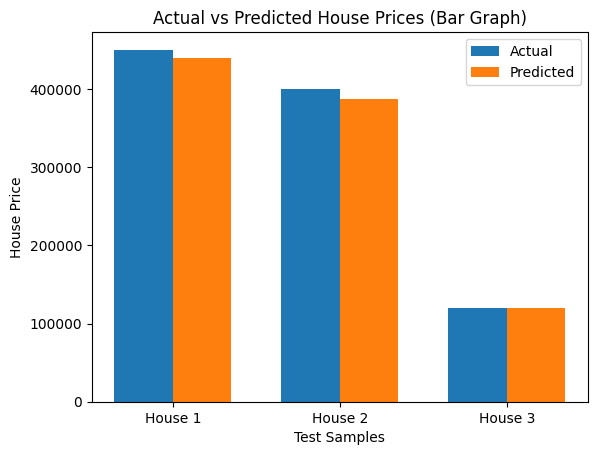

In [19]:
# Reset index for plotting
results = results.reset_index(drop=True)

# Create bar graph
bar_width = 0.35
x = np.arange(len(results))  # positions

plt.bar(x - bar_width/2, results['Actual'], width=bar_width, label='Actual')
plt.bar(x + bar_width/2, results['Predicted'], width=bar_width, label='Predicted')

plt.xlabel("Test Samples")
plt.ylabel("House Price")
plt.title("Actual vs Predicted House Prices (Bar Graph)")
plt.xticks(x, [f"House {i+1}" for i in range(len(results))])
plt.legend()
plt.show()

